In [77]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
X = np.eye(8)
#Each row is a learning example

Y = X
print(Y)

# We need to have 8 inputs (each number in a row of the matrix), a hidden layer with 3 nodes + bias and an output layer with 8 nodes

n_input = 8 # We need to have 8 inputs (each number in a row of the matrix)
n_hidden = 3
n_output = 8

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [79]:
epsilon = 0.1

#Weights
np.random.seed(42)

w1 = np.random.normal(0, epsilon, (n_input, n_hidden)) # 8 x 3 Weights for input to hidden
print(w1)
w2 = np.random.normal(0, epsilon, (n_hidden, n_output)) # 3 x 8 Weights for hidden to output
print(w2)

# # w1 = np.zeros((n_input, n_hidden))
# # print(w1)
# # w2 = np.zeros((n_hidden, n_output))

#Biases
b1 = np.random.normal(0, epsilon, n_hidden) # Bias for hidden layer (3)
b2 = np.random.normal(0, epsilon, n_output) # Bias for output layer (8)

# b1 = np.zeros(n_hidden)
# b2 = np.zeros(n_output)






[[ 0.04967142 -0.01382643  0.06476885]
 [ 0.15230299 -0.02341534 -0.0234137 ]
 [ 0.15792128  0.07674347 -0.04694744]
 [ 0.054256   -0.04634177 -0.04657298]
 [ 0.02419623 -0.19132802 -0.17249178]
 [-0.05622875 -0.10128311  0.03142473]
 [-0.09080241 -0.14123037  0.14656488]
 [-0.02257763  0.00675282 -0.14247482]]
[[-0.05443827  0.01109226 -0.11509936  0.0375698  -0.06006387 -0.02916937
  -0.06017066  0.18522782]
 [-0.00134972 -0.10577109  0.08225449 -0.12208436  0.02088636 -0.19596701
  -0.1328186   0.01968612]
 [ 0.07384666  0.01713683 -0.01156483 -0.03011037 -0.1478522  -0.07198442
  -0.04606388  0.10571222]]


In [80]:
#Activation function, our single neuron corresponds exactly to the input-output mapping defined by logistic regression.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#Used to compute the weighted input for a layer, which then is put into the activation function
def weighted_input(X, W, b):
    return np.dot(X, W) + b

#One-half squared-error cost function
def halfmse(Y, second_layer_output):
    return np.mean(0.5 * (Y - second_layer_output) ** 2)

In [81]:

#Could also have used a*(1-a) if we don't want to calculate z serperatly
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

#Element-wise multiplication
def delta_output(Y, a, z):
    return (a-Y)*sigmoid_derivative(z)

#In order to do the matrix multiplication, we use this order because each row is a learning example
def delta_hidden(W, next_delta, z):
    return np.dot(next_delta, np.transpose(W))*sigmoid_derivative(z)

#In order to do the matrix multiplication, again we use this order because each row is a learning example
def gradient_weight(next_delta, a):
    return np.dot(np.transpose(a), next_delta)
    
#Sum over rows (axis=0), as again each row is a learning example
def gradient_bias(next_delta):
    return np.sum(next_delta, axis=0)


In [82]:

alpha = 1

converged = False
i = 0

#For plotting
it_plot = []
loss_plot = []

while(converged is False):
    
    #Input layer
    a1 = X

    #Hidden layer
    z2 = weighted_input(X, w1, b1)
    a2 = sigmoid(z2)
    
    #Output layer
    z3 = weighted_input(a2, w2, b2)
    a3 = sigmoid(z3)

    #Output layer
    delta3 = delta_output(Y, a3, z3)

    #Hidden layer
    delta2 = delta_hidden(w2, delta3, z2)
    
    #Gradient for weight is same shape as W1/W2 (8x3/3x8)
    #Gradient for bias is same shape as b1/b2 (1x3/1x8)
    Delta_w2 = gradient_weight(delta3, a2)
    Delta_b2 = gradient_bias(delta3)

    Delta_w1 = gradient_weight(delta2, X)
    Delta_b1 = gradient_bias(delta2)

    #Update weights, devide by amount of learning examples
    w1 += -alpha*(Delta_w1/8)
    w2 += -alpha*(Delta_w2/8)

    #Update bias
    b1 += -alpha*(Delta_b1/8)
    b2 += -alpha*(Delta_b2/8)
    
    #Keep track for plot
    loss_plot.append(halfmse(Y,a3))
    it_plot.append(i)
    i+=1
    
    if i % 1000 == 0:
            print("MSE after iteration", i, ":", halfmse(Y, a3))
             
            # print(w1)
            # print(w2)
            
            print(a3)
            
    if halfmse(Y,a3) < 0.01:
        converged = True
        print("MSE after iteration", i, ":", halfmse(Y, a3))
             
        print(w1)
        print(w2)
            
        print(a2)
        print(a3)


        break
            
          
           

MSE after iteration 1000 : 0.03966163464229914
[[0.22292054 0.10289499 0.21283901 0.08823641 0.05549838 0.11266907
  0.17858651 0.11174579]
 [0.11607442 0.16695137 0.07487337 0.16046784 0.12519196 0.16096009
  0.09859991 0.12456151]
 [0.22277381 0.08944793 0.53484454 0.08927197 0.21127441 0.07104762
  0.07084374 0.16680825]
 [0.11050069 0.18026791 0.07922757 0.1880212  0.18246225 0.17874072
  0.10472717 0.13555613]
 [0.09380088 0.17540495 0.20066389 0.20905239 0.51565818 0.12546218
  0.03413425 0.19759104]
 [0.13653184 0.17265408 0.06086493 0.17129837 0.0913163  0.21144632
  0.21408917 0.11192081]
 [0.24888009 0.13955186 0.09428453 0.14129409 0.04049652 0.26247661
  0.62037767 0.09285017]
 [0.13074585 0.13533169 0.16758453 0.12767408 0.1663728  0.10624643
  0.05510201 0.14291405]]
MSE after iteration 2000 : 0.016581357309635447
[[7.41061068e-01 9.12376311e-02 1.25944850e-01 2.16422562e-03
  4.41789004e-04 9.00860236e-03 1.14760896e-01 1.09744773e-01]
 [6.73277541e-02 3.68715389e-01 1.3

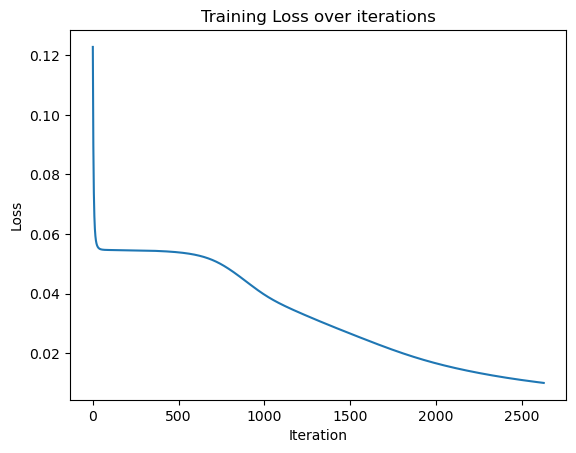

In [83]:
plt.plot(it_plot, loss_plot)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss over iterations")
plt.show()

In [84]:

alpha_list = [0.01, 0.05, 0.25, 1.25, 5, 25, 50]



#For plotting
it_needed_plot = []
alpha_plot = []

for alpha in alpha_list:
    converged = False
    i = 0
    
    #Again initialization, as w1, w2, b1, and b2 are already updated for convergence before.
    w1 = np.random.normal(0, epsilon, (n_input, n_hidden)) # 8 x 3 Weights for input to hidden
    print(w1)
    w2 = np.random.normal(0, epsilon, (n_hidden, n_output)) # 3 x 8 Weights for hidden to output
    print(w2)

    #Biases
    b1 = np.random.normal(0, epsilon, n_hidden) # Bias for hidden layer (3)
    b2 = np.random.normal(0, epsilon, n_output) # Bias for output layer (8)
    
    while(converged is False):
        
        #Input layer
        a1 = X

        #Hidden layer
        z2 = weighted_input(X, w1, b1)
        a2 = sigmoid(z2)
        
        #Output layer
        z3 = weighted_input(a2, w2, b2)
        a3 = sigmoid(z3)

        #Output layer
        delta3 = delta_output(Y, a3, z3)

        #Hidden layer
        delta2 = delta_hidden(w2, delta3, z2)
        
        #Gradient for weight is same shape as W1/W2 (8x3/3x8)
        #Gradient for bias is same shape as b1/b2 (1x3/1x8)
        Delta_w2 = gradient_weight(delta3, a2)
        Delta_b2 = gradient_bias(delta3)

        Delta_w1 = gradient_weight(delta2, X)
        Delta_b1 = gradient_bias(delta2)

        #Update weights, devide by amount of learning examples
        w1 += -alpha*(Delta_w1/8)
        w2 += -alpha*(Delta_w2/8)

        #Update bias
        b1 += -alpha*(Delta_b1/8)
        b2 += -alpha*(Delta_b2/8)
        
        i += 1
        
        if i % 1000 == 0:
                print("MSE after iteration", i, ":", halfmse(Y, a3))
                
                # print(w1)
                # print(w2)
                
                print(a3)
                
        #Converged if loss is below 0.01
        if halfmse(Y,a3) < 0.01:
            converged = True
            print("MSE after iteration", i, ":", halfmse(Y, a3))
                
            print(w1)
            print(w2)
                
            print(a3)
            
            it_needed_plot.append(i)
            alpha_plot.append(alpha)
        

            break

[[ 0.09755451 -0.04791742 -0.0185659 ]
 [-0.1106335  -0.11962066  0.08125258]
 [ 0.135624   -0.00720101  0.10035329]
 [ 0.0361636  -0.06451198  0.03613956]
 [ 0.15380366 -0.0035826   0.15646437]
 [-0.26197451  0.08219025  0.00870471]
 [-0.02990074  0.00917608 -0.19875689]
 [-0.02196719  0.03571126  0.1477894 ]]
[[-0.05182702 -0.08084936 -0.0501757   0.09154021  0.03287511 -0.05297602
   0.05132674  0.00970775]
 [ 0.0968645  -0.07020531 -0.03276621 -0.03921082 -0.14635149  0.02961203
   0.02610553  0.00051135]
 [-0.02345871 -0.14153707 -0.04206453 -0.03427145 -0.08022773 -0.01612857
   0.04040509  0.18861859]]
MSE after iteration 1000 : 0.0647645433705403
[[0.25768108 0.25752762 0.26499944 0.28422753 0.26195955 0.26792321
  0.27160062 0.26865874]
 [0.25998219 0.26049518 0.26800775 0.28660356 0.26428217 0.27118398
  0.27395386 0.27218182]
 [0.25546543 0.25435588 0.26229128 0.28109051 0.25916426 0.26525532
  0.26926109 0.26730379]
 [0.25800841 0.25795979 0.26552481 0.28453282 0.26232205 0

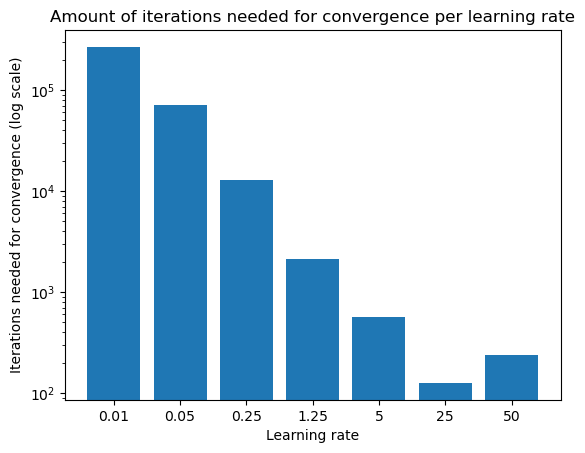

In [85]:
plt.bar(range(len(alpha_plot)),it_needed_plot)

plt.xlabel("Learning rate")
plt.ylabel("Iterations needed for convergence (log scale)")

plt.yscale('log')
plt.xticks(range(len(alpha_list)), alpha_list)

plt.title("Amount of iterations needed for convergence per learning rate")

plt.show()